<a href="https://colab.research.google.com/github/piecurus/colab/blob/master/LeNet_D2L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet

     |████████████████████████████████| 68.7MB 61kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [1]:
!pwd

/content


In [0]:
import d2l # load from local computer
from mxnet import autograd, gluon, init, np, npx
from mxnet.gluon import nn
npx.set_np()

**Basic LeNet**

In [0]:
lenet = nn.Sequential()
lenet.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=5, activation='sigmoid'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Dense(120, activation='sigmoid'),
        nn.Dense(84, activation='sigmoid'),
        nn.Dense(10))

In [5]:
X = np.random.uniform(size=(1,1,28,28))
lenet.initialize()
for layer in lenet:
  X = layer(X)
  print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 6, 28, 28)
pool0 output shape:	 (1, 6, 14, 14)
conv1 output shape:	 (1, 16, 10, 10)
pool1 output shape:	 (1, 16, 5, 5)
dense0 output shape:	 (1, 120)
dense1 output shape:	 (1, 84)
dense2 output shape:	 (1, 10)


**Data Acquisition and Training**

In [9]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)


loss 0.475, train acc 0.821, test acc 0.811
2177.8 examples/sec on cpu(0)


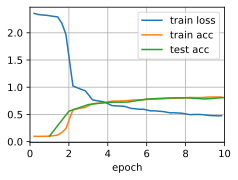

In [12]:
lr, num_epochs = 0.9, 10
d2l.train_ch6(lenet, train_iter, test_iter, num_epochs, lr)


**Testing ReLU**

In [0]:
lenet = nn.Sequential()
lenet.add(nn.Conv2D(channels=6, kernel_size=5, padding=2, activation='relu'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Conv2D(channels=16, kernel_size=5, activation='relu'),
        nn.AvgPool2D(pool_size=2, strides=2),
        nn.Dense(120, activation='relu'),
        nn.Dense(84, activation='relu'),
        nn.Dense(10))

In [4]:
X = np.random.uniform(size=(1,1,28,28))
lenet.initialize()
for layer in lenet:
  X = layer(X)
  print(layer.name, 'output shape:\t', X.shape)

conv0 output shape:	 (1, 6, 28, 28)
pool0 output shape:	 (1, 6, 14, 14)
conv1 output shape:	 (1, 16, 10, 10)
pool1 output shape:	 (1, 16, 5, 5)
dense0 output shape:	 (1, 120)
dense1 output shape:	 (1, 84)
dense2 output shape:	 (1, 10)


In [0]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)



KeyboardInterrupt: ignored

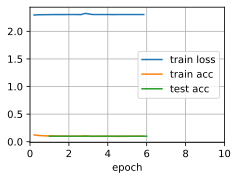

In [6]:
lr, num_epochs = 0.9, 10
d2l.train_ch6(lenet, train_iter, test_iter, num_epochs, lr)